<a href="https://colab.research.google.com/github/shyamjith94/PyTorch/blob/main/TimeSeriesLSTM(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as NN

In [5]:
x = torch.linspace(0, 799, 800)

In [6]:
y = torch.sin(x*2*3.1416/40)

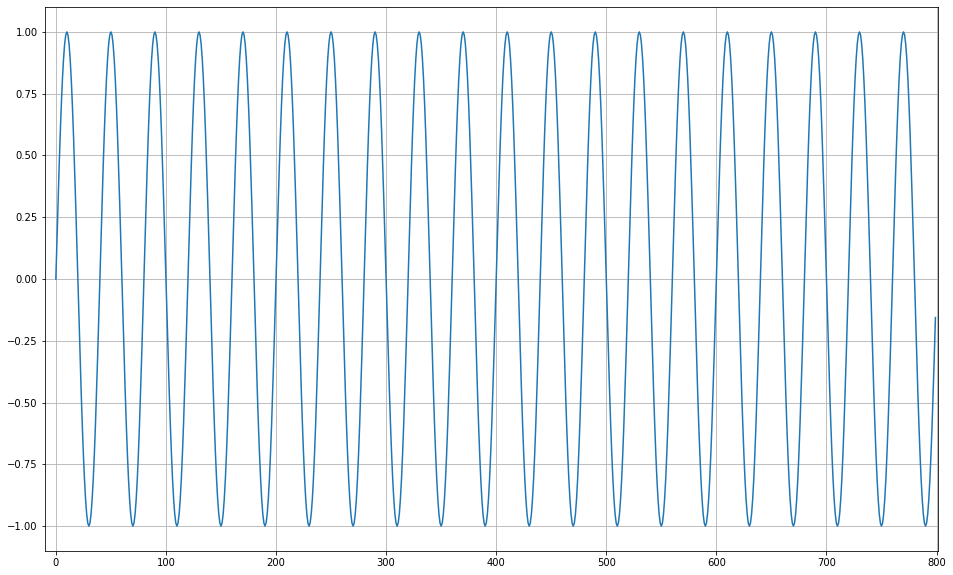

In [9]:
plt.figure(figsize=(16,10))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [10]:
test_size=40
train_set = y[:-test_size]
test_set = y[-test_size:]

In [11]:
test_set

tensor([ 2.7750e-04,  1.5671e-01,  3.0928e-01,  4.5424e-01,  5.8801e-01,
         7.0730e-01,  8.0918e-01,  8.9114e-01,  9.5114e-01,  9.8773e-01,
         1.0000e+00,  9.8764e-01,  9.5097e-01,  8.9088e-01,  8.0885e-01,
         7.0691e-01,  5.8755e-01,  4.5373e-01,  3.0875e-01,  1.5615e-01,
        -2.8641e-04, -1.5672e-01, -3.0929e-01, -4.5424e-01, -5.8802e-01,
        -7.0731e-01, -8.0919e-01, -8.9114e-01, -9.5115e-01, -9.8773e-01,
        -1.0000e+00, -9.8764e-01, -9.5097e-01, -8.9088e-01, -8.0885e-01,
        -7.0690e-01, -5.8755e-01, -4.5373e-01, -3.0874e-01, -1.5614e-01])

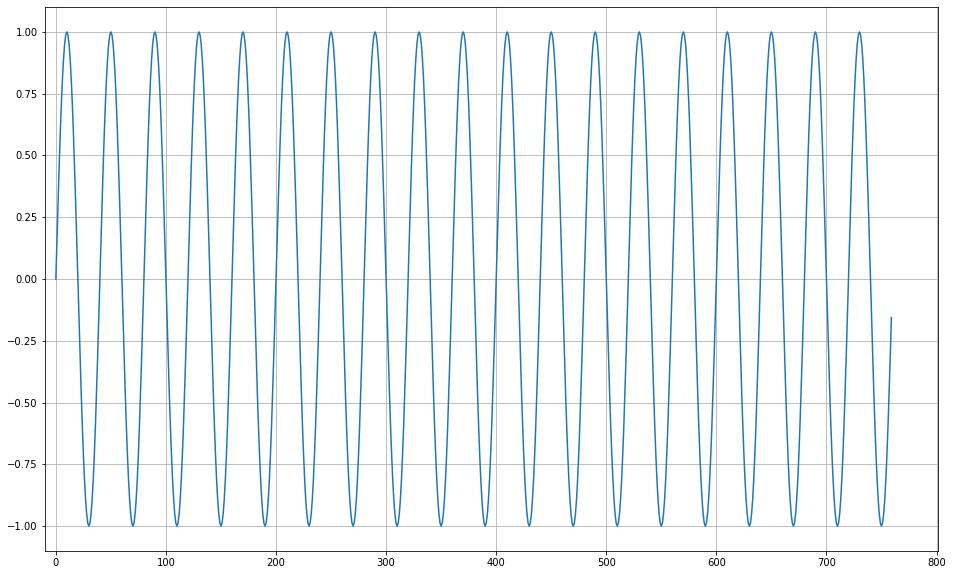

In [12]:
plt.figure(figsize=(16,10))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

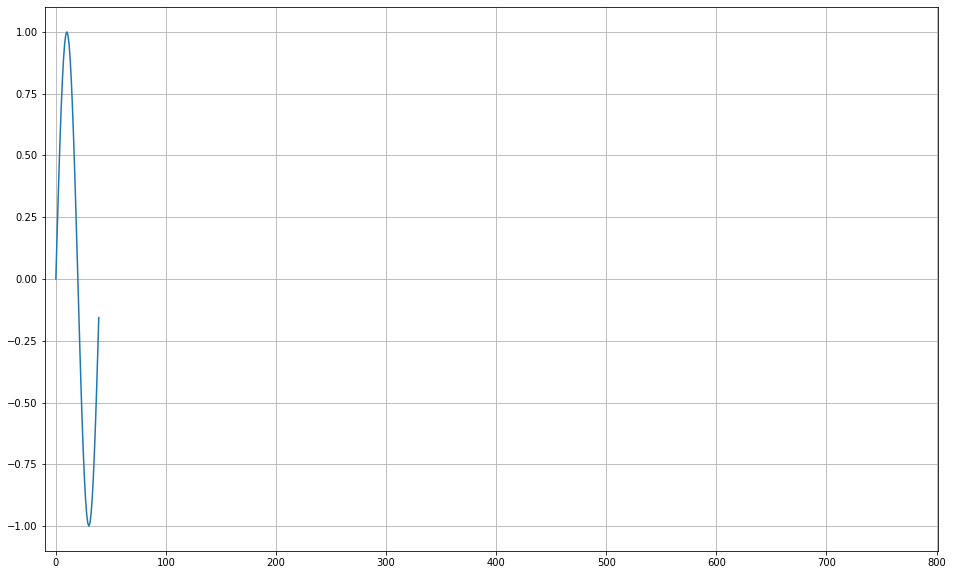

In [13]:
plt.figure(figsize=(16,10))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(test_set.numpy())

In [14]:
def input_data(freq, win):

    output = [] #([0,1,2,3],[4], [1,2,3,4],[5])
    LENGTH = len(freq)

    for i in range(LENGTH-win):
        window = freq[i:i+win]
        label = freq[i+win:i+win+1]
        output.append((window, label))

    return output

In [18]:
window_size = 40
train_data = input_data(train_set,window_size)
len(train_data)
# 0 to 799 = 800
# 800 - 40 = 760
# 760 - 40 = 720

720

In [19]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [20]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

In [57]:
class Lstm(NN.Module):

    def __init__(self,input_size=1, hidden_size=50, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        # hidden_size # number of hiden layers
        # input_size # num input column
        # ouput_size # number output column
        self.lstm = NN.LSTM(input_size, hidden_size)
        self.linear = NN.Linear(hidden_size, output_size)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size)) # need for each neroun set hidden state and cell state

    def forward(self, seq):
        lstm_out , self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden) # lstm except input, curent hiden state, cell state
        pred = self.linear(lstm_out.view(len(seq), -1))

        return pred[-1] # lstm have sequence of pred need only last value

In [58]:
torch.manual_seed(42)
model = Lstm()
criterion = NN.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [59]:
model

Lstm(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [60]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


epochs 0 loss 0.0001327927748207003
performance on test range 0.006366844289004803


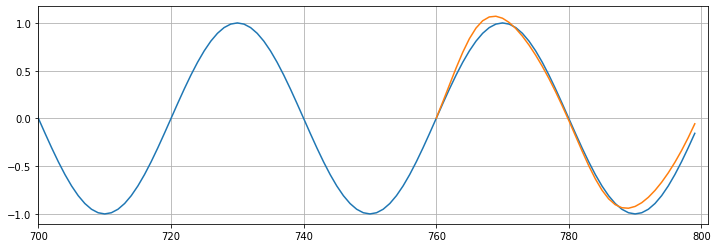

epochs 1 loss 0.00012966558279003948
performance on test range 0.005795469973236322


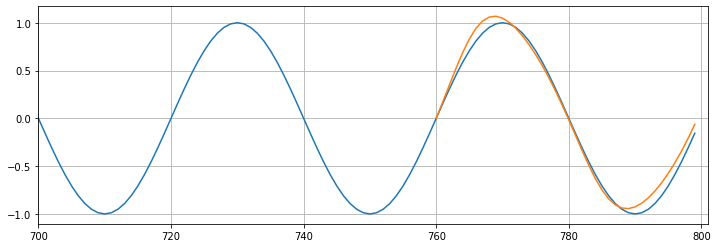

epochs 2 loss 0.00012561386392917484
performance on test range 0.005315433256328106


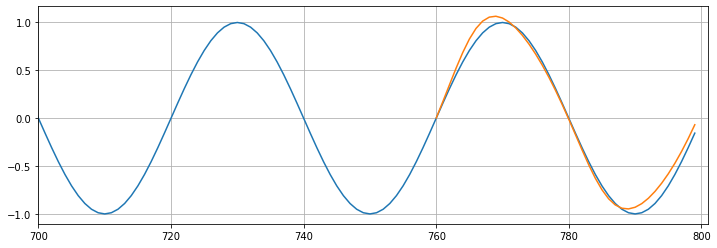

epochs 3 loss 0.00012097656144760549
performance on test range 0.004909132607281208


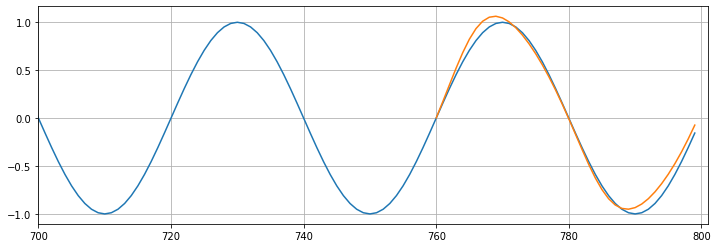

epochs 4 loss 0.00011599628487601876
performance on test range 0.004562586545944214


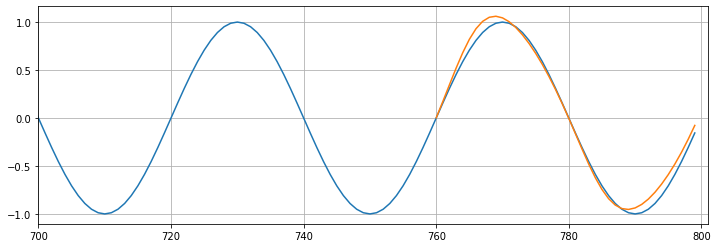

epochs 5 loss 0.00011086133599746972
performance on test range 0.004265078343451023


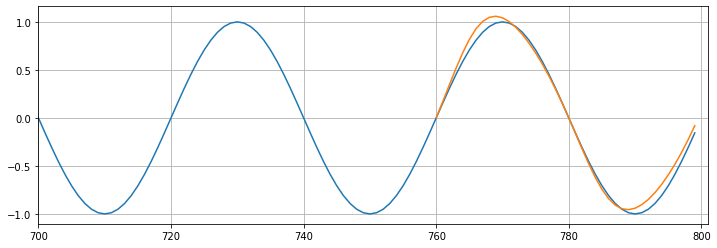

epochs 6 loss 0.00010570746962912381
performance on test range 0.004007863812148571


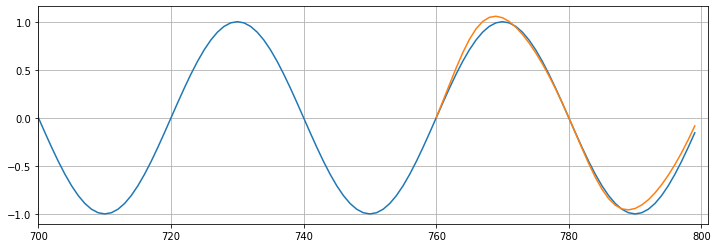

epochs 7 loss 0.0001006296297418885
performance on test range 0.0037842574529349804


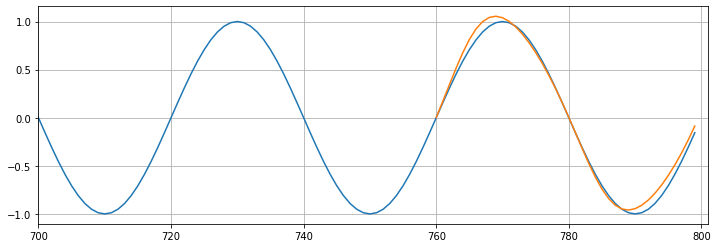

epochs 8 loss 9.569542453391477e-05
performance on test range 0.0035886529367417097


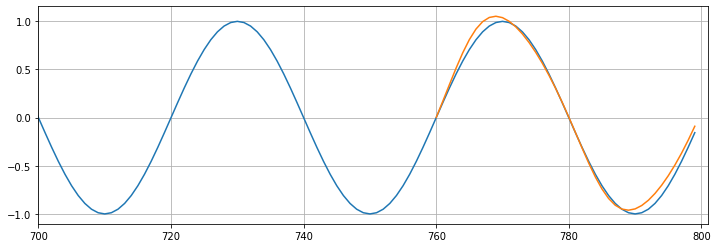

epochs 9 loss 9.094662527786568e-05
performance on test range 0.0034164967946708202


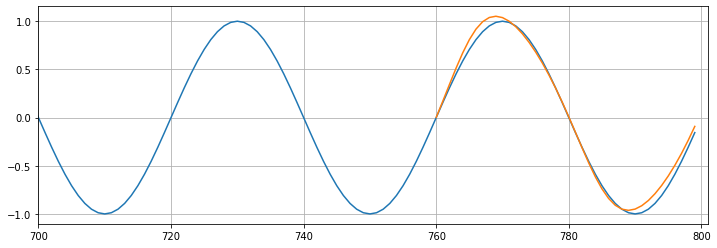

In [64]:
epochs = 10
future = 40

for i  in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"epochs {i} loss {loss.item()}")

    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():
            # resetting
            model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))
            preds.append(model(seq).item())
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])

    print(f"performance on test range {loss}")

    plt.figure(figsize=(12,4))
    plt.xlim(700, 801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[-window_size:])
    plt.show()


In [65]:
# train all data
epochs = 10
future = 40
window_size = 40 

all_data = input_data(y, window_size)
len(all_data)

760

In [66]:
%%time

for i  in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"epochs {i} loss {loss.item()}")

epochs 0 loss 8.614515536464751e-05
epochs 1 loss 8.162218000506982e-05
epochs 2 loss 7.735950930509716e-05
epochs 3 loss 7.335860573220998e-05
epochs 4 loss 6.96105562383309e-05
epochs 5 loss 6.610415584873408e-05
epochs 6 loss 6.28307243459858e-05
epochs 7 loss 5.977443652227521e-05
epochs 8 loss 5.692086779163219e-05
epochs 9 loss 5.4258856835076585e-05
CPU times: user 1min 6s, sys: 7.63 ms, total: 1min 6s
Wall time: 1min 7s


In [68]:
# forcast for unknow future
preds = y[-window_size:].tolist()

for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        # resetting
        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                torch.zeros(1, 1, model.hidden_size))
        preds.append(model(seq).item())

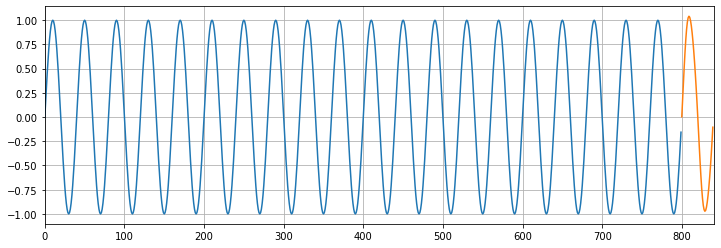

In [69]:
plt.figure(figsize=(12, 4))
plt.xlim(0, 841)
plt.grid(True)
plt.plot(y.numpy())
# plot forcast
plt.plot(range(800, 800+future), preds[window_size:])